In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

beca = pd.read_csv("climaxpais1.csv")
print(beca.head)

<bound method NDFrame.head of                 dt  averagetemperature  averagetemperatureuncertainty  \
0       1743-11-01               4.384                          2.294   
1       1744-04-01               1.530                          4.680   
2       1744-05-01               6.702                          1.789   
3       1744-06-01              11.609                          1.577   
4       1744-07-01              15.342                          1.410   
5       1744-09-01              11.702                          1.517   
6       1744-10-01               5.477                          1.862   
7       1744-11-01               3.407                          1.425   
8       1744-12-01              -2.181                          1.641   
9       1745-01-01              -3.850                          1.841   
10      1745-02-01              -6.575                          1.360   
11      1745-03-01              -4.195                          1.213   
12      1745-04-01   

In [33]:
#tenemos coordenadas x,y
#una columna para las x y otra para las y
#x = beca.iloc[:, 0[150:]]
#y = beca.iloc[:, 1[150:]]
x = beca.iloc[:, 1]
y = beca.iloc[:, 2]

In [34]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

#x[np.isfinite(x) == True] = 0
#y[np.isfinite(y) == True] = 0

In [35]:
beca.head

<bound method NDFrame.head of                 dt  averagetemperature  averagetemperatureuncertainty  \
0       1743-11-01               4.384                          2.294   
1       1744-04-01               1.530                          4.680   
2       1744-05-01               6.702                          1.789   
3       1744-06-01              11.609                          1.577   
4       1744-07-01              15.342                          1.410   
5       1744-09-01              11.702                          1.517   
6       1744-10-01               5.477                          1.862   
7       1744-11-01               3.407                          1.425   
8       1744-12-01              -2.181                          1.641   
9       1745-01-01              -3.850                          1.841   
10      1745-02-01              -6.575                          1.360   
11      1745-03-01              -4.195                          1.213   
12      1745-04-01   

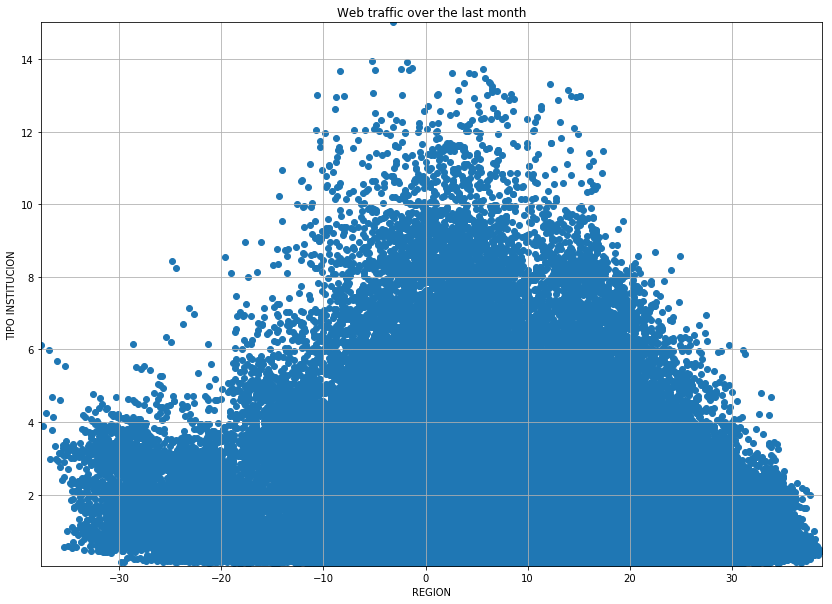

In [36]:
import matplotlib.pyplot as plot

plot.figure(figsize=(14,10))
plot.scatter(x, y)
plot.title("Web traffic over the last month")
plot.ylabel("TIPO INSTITUCION")
plot.xlabel("REGION")
plot.autoscale(tight=True)
plot.grid()
plot.show()

In [37]:
train = x[::, np.newaxis]
target = y.copy()


In [38]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(train, target)

print("Puntación modelo lineal: ", linear.score(train, target))


Puntación modelo lineal:  0.0930501315993


In [39]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento / prueba 
x_train, x_test, y_train, y_test = train_test_split(train, target)

# Entrenar el modelo usando los conjuntos de entrenamiento
linear.fit(x_train, y_train)

# Puntuación de la varianza: 1 es la predicción perfecta 
puntuacion = linear.score(x_test, y_test)
print('Puntuacion:',puntuacion)

Puntuacion: 0.0939378615387


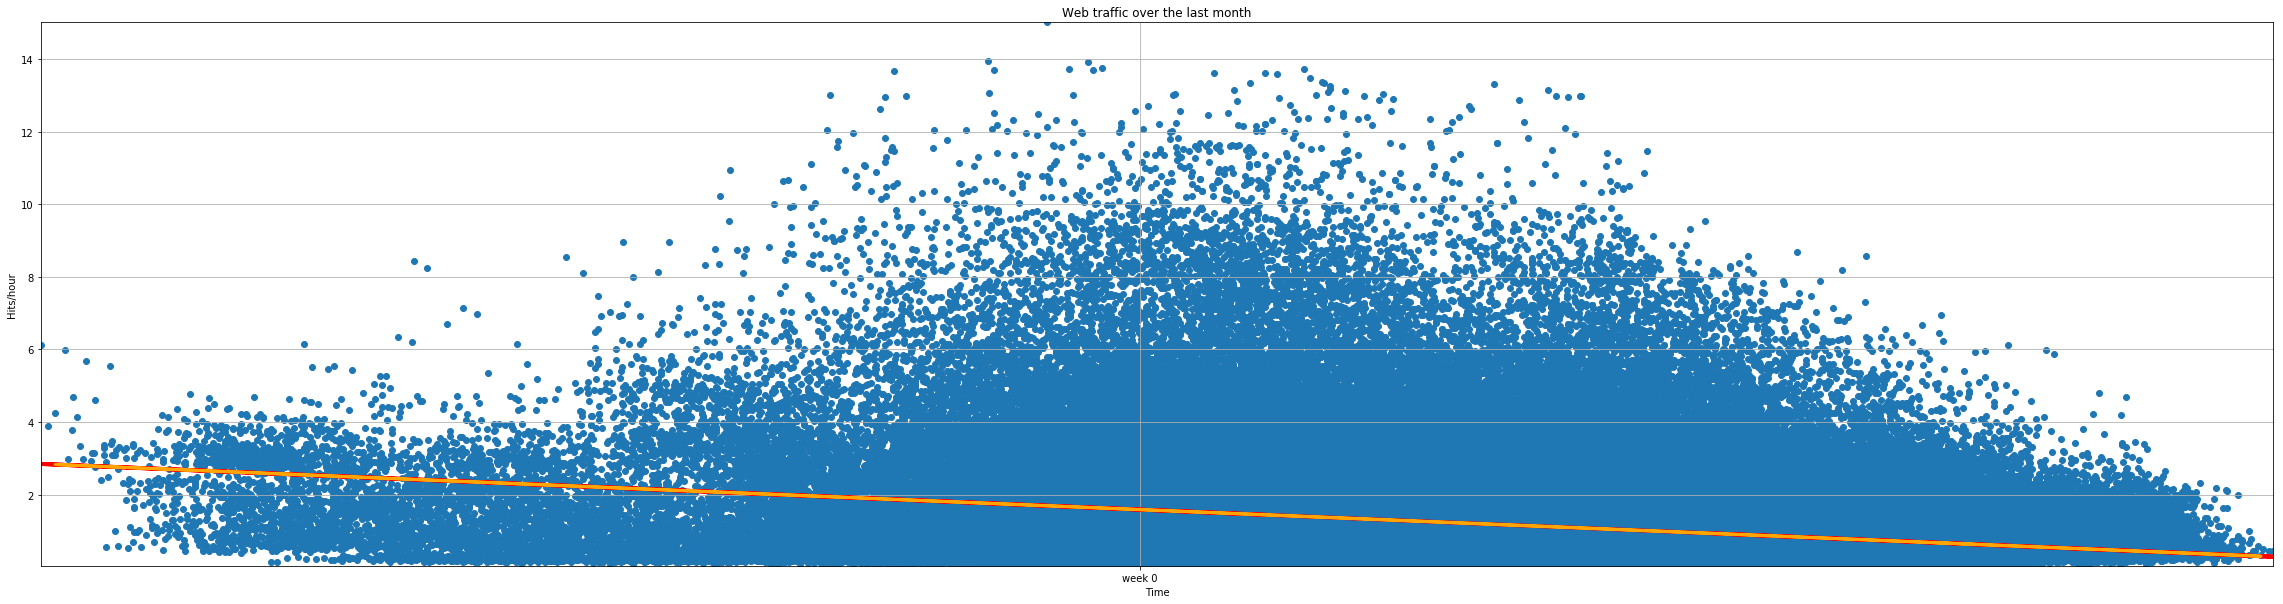

In [40]:
plot.figure(figsize=(40,10))
plot.scatter(x, y)
plot.title("Web traffic over the last month")
plot.xlabel("Time")
plot.ylabel("Hits/hour")
plot.xticks([w*7*24 for w in range(10)], ['week %i'%w for w in range(10)])
plot.autoscale(tight=True)
plot.grid()
plot.plot(train, linear.predict(train), color="red",linewidth=4)
plot.plot(x_test, linear.predict(x_test), color='orange', linewidth=3)
plot.show()

In [41]:
##Comprobar otros modelos que nos puedan dar una mejor aproximación de los datos
## LinearRegression 
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
train = x[::, np.newaxis]
target = y.copy()
linear.fit(train, target)

print("Linear Model : ", linear.score(train, target))

## RandomForest
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
train = x[::, np.newaxis]
target = y.copy()
random.fit(train, target)
print("RandomForest Model : ", random.score(train, target))

## Polynomial degree
from sklearn.linear_model import Ridge
import numpy as np

ridge = Ridge()
rtrain = np.vander(x, 4 + 1)
target = y.copy()

ridge.fit(rtrain, target)

print("RidgeRegression Model : ", ridge.score(rtrain, target))

Linear Model :  0.0930501315993
RandomForest Model :  0.213708722914
RidgeRegression Model :  0.0971957304954


In [44]:
plot.figure(figsize=(12, 6))
plot.scatter(train, target)
#Linear
plot.plot(train, linear.predict(train),color="red", linewidth=4)

#RandomForest
plot.plot(train, random.predict(train),color="green", linewidth=4)

#Ridge
plot.plot(train, ridge.predict(rtrain),color="orange", linewidth=4)

plot.legend(["Linear", "RandomForest", "RidgeRegression"], loc="upper left")


plot.ylim(ymax=8, ymin=0)

plot.show()

ValueError: x and y must have same first dimension, but have shapes (544811, 1) and (490329,)

In [43]:
from sklearn import cross_validation as cv
from sklearn.cross_validation import cross_val_score

def split_data(X_data, y_data):
    """ Split the dataset in train and test """
    return cv.train_test_split(X_data, y_data, test_size=0.1, random_state=0)

X_train, X_test, y_train, y_test = split_data(train, target)
#Linear
linear.fit(X_train, y_train)
print("Linear Model Score : ", linear.score(X_test, y_test))
scores_linear = cross_val_score(linear, X_test, y_test)
print("Linear Model Score mean : ", scores_linear.mean())

#Random
random.fit(X_train, y_train)
print("RandomForest Model Score : ", random.score(X_test, y_test))
scores_random = cross_val_score(random, X_test, y_test)
print("RandomForest Model Score mean : ", scores_random.mean())

#RidgeRegression
rtrain = np.vander(X_train[::, 0], 4 + 1)
rtest = np.vander(X_test[::, 0], 4 + 1)
ridge.fit(rtrain, y_train)
print("RidgeRegression Model Score: ", ridge.score(rtest, y_test))
scores_ridge = cross_val_score(linear, rtest, y_test)
print("RidgeRegression Model Score mean : ", scores_ridge.mean())

Linear Model Score :  0.0918846119532
Linear Model Score mean :  0.0917344481543
RandomForest Model Score :  -0.0440984440342
RandomForest Model Score mean :  -0.320195972963
RidgeRegression Model Score:  0.0965667439732
RidgeRegression Model Score mean :  0.0963106204179
